<h1 style="text-align:center;
            color:darkblue;
            font-size:48px;"><b>Fingerprint Matrix</b></h1>



<br>
In this fast-paced world, we frequently interact with people from different backgrounds who hold diverse beliefs and morals. 

Moreover, personal appearance varies for each individual.

We believe that each person has a unique marker that determines how they present themselves to the outside world. 

Furthermore, we believe that in each interaction, we can **quantify** the **individual identity** of each person and the **shared stimulus** between all people.

We suggest that each individual will have a **weight matrix**, which is multiplied by the **universal stimulus matrix** (which is the same for all subjects). 

The multiplication of the **weight matrix** and the **stimulus matrix** will result in the **response matrix** of the individual.

Let's model it to make it clearer:

We have our underlying assumptions:

1. i = 1,2...,m for m **subjects**
2. We have our index v for different **voxels** and our index d for different **timeframes**
3. We'll define our matrix $X_i$ with dimensions $v_{rows}$ X $d_{columns}$

Let's write our suggested model:

For the matrices:  

$X_i \in \mathbb{R}^{v x d}$, $W_i \in \mathbb{R}^{v x k}$, $S \in \mathbb{R}^{k x d}$ : 

Model_1 is:

$$
X_i = W_i \cdot S + E_i \quad, \quad \text{ for i subject in our sample}
$$

Note: to ensure uniqueness of coordinates it is necessary that $W_i$ has
linearly independent columns.

Thus, in our model we make a bigger assumption that the weights matrix is **orthogonal**, meaning: $\quad W_i^T W_i = I _{k}$


Now we're going to optimize our $W_i$ in the following method:



    

1. Our goal is to **minimize** the `Reconstruction Error`:  

$$
Min_{W_i,S} \quad \sum_{i = 1}^{m} \| X_{i} - W_{i} S \|_F^2
$$

2. Select initial $W_i$
<br>

3. Set $S = \frac{1}{m} \sum_{i = 1}^{m} W_i^T X_i$
<br>

4. We have m separate subproblems of the form $ \quad \sum_{i = 1}^{m} \| X_{i} - W_{i} S \|_F^2$

<br>

5. Our solution for each subject in each iteration is:

$$
W_{i} = \tilde U_{i} \tilde V_{i}^T \quad \text{where} \quad \tilde U_{i} \tilde D_{i} \tilde V_{i}^T = SVD(X_{i}S^T)
$$

One question immediately comes to mind: 

***WHAT'S SVD?***


<br>

***

## **SVD** 

SVD says we can write **ANY** matrix A as $A_{mxn} = U_{mxm} D_{mxn} V^T_{nxn} \quad$ where:

**U** is an **orthogonal matrix** (each of its rows and columns are orthonormal vectors). in general, if A is an m x n matrix, then V is an m x m matrix:

<br>

$$
U = \begin{bmatrix} | & | & | & | \\ u_{1} & u_{2} & ... & u_{n} \\ | & | & | & | \end{bmatrix}
$$

<br>

**D** is matrix with the **singular values** on the diagonal and zeros elsewhere. In general if A is an m x n matrix, then D is an m x n matrix. We have in our main diagonal the singular values of A which equal to the square root of the eigenvalues of $A^TA$ or $AA^T$. The rest of the elements are zeros:

<br>

$$
D = \begin{bmatrix} d_{1} & 0 & 0 & 0 & 0 &... &0 \\ 0 & d_{2} & 0 & 0 & 0 &... &0 \\ 0 & 0 & ... & 0 & 0 &... &0 \\ 0 & 0 & 0 & d_{n} & 0 &... &0 \end{bmatrix}
$$

<br>

**V** is an **orthogonal** matrix too. In general, if A is an m x n matrix, then V is an n x n matrix.

<br>

$$
V = \begin{bmatrix} | & | & | & | \\ v_{1} & v_{2} & ... & v_{n} \\ | & | & | & | \end{bmatrix}
$$

### Let's visualize it shall we?

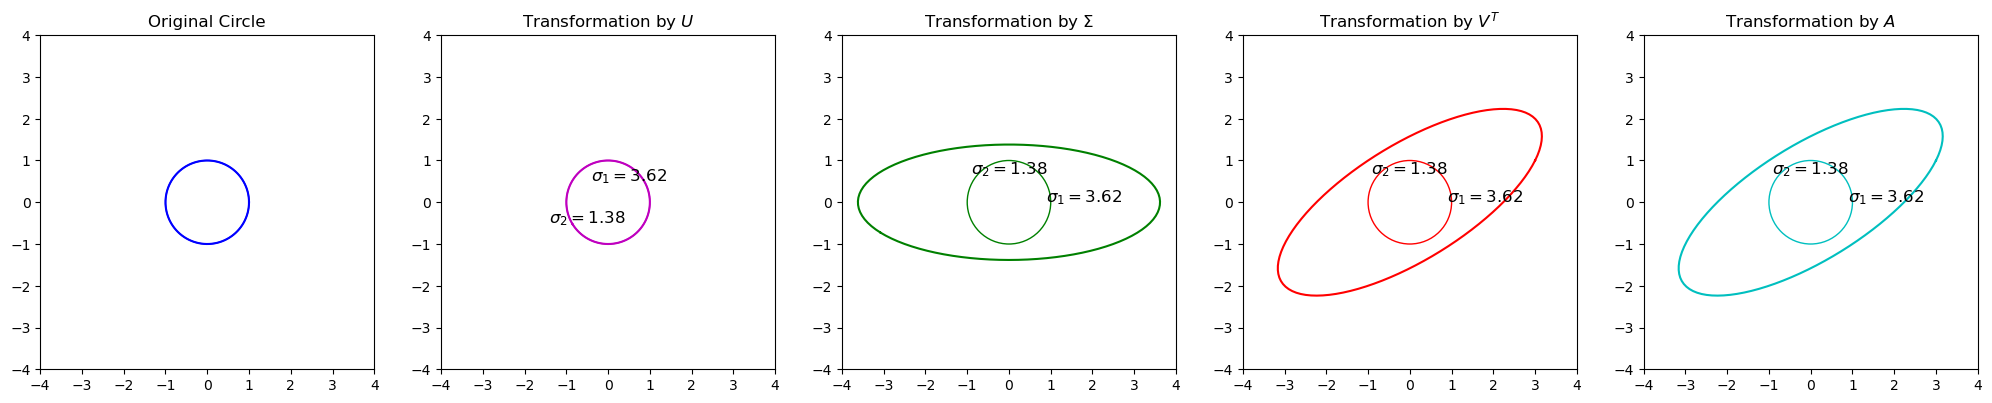

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_circle(ax, center, radius, **kwargs):
    """Plot a circle with a given center and radius."""
    circle = plt.Circle(center, radius, **kwargs)
    ax.add_artist(circle)

# Generate a circle of points
theta = np.linspace(0, 2 * np.pi, 100)
circle = np.vstack((np.cos(theta), np.sin(theta)))

# Define a matrix to be decomposed
A = np.array([[3, 1], [1, 2]])

# Perform SVD
U, Sigma, Vt = np.linalg.svd(A)
Sigma_matrix = np.diag(Sigma)

# Apply transformations
circle_U = U @ circle
circle_SigmaU = Sigma_matrix @ circle_U
circle_SigmaUVt = Vt @ circle_SigmaU
circle_A = A @ circle

# Plotting
fig, ax = plt.subplots(1, 5, figsize=(25, 5))

# Original circle
ax[0].plot(circle[0, :], circle[1, :], 'b')
plot_circle(ax[0], (0, 0), 1, color='b', fill=False)
ax[0].set_xlim(-4, 4)
ax[0].set_ylim(-4, 4)
ax[0].set_aspect('equal', 'box')
ax[0].set_title("Original Circle")

# Transformed by U
ax[1].plot(circle_U[0, :], circle_U[1, :], 'm')
plot_circle(ax[1], (0, 0), 1, color='m', fill=False)
ax[1].set_xlim(-4, 4)
ax[1].set_ylim(-4, 4)
ax[1].set_aspect('equal', 'box')
ax[1].set_title("Transformation by $U$")
ax[1].annotate(f"$\\sigma_1 = {Sigma[0]:.2f}$", (0.5, 0.5), color='black', fontsize=12, ha='center')
ax[1].annotate(f"$\\sigma_2 = {Sigma[1]:.2f}$", (-0.5, -0.5), color='black', fontsize=12, ha='center')

# Transformed by Sigma
ax[2].plot(circle_SigmaU[0, :], circle_SigmaU[1, :], 'g')
plot_circle(ax[2], (0, 0), 1, color='g', fill=False)
ax[2].set_xlim(-4, 4)
ax[2].set_ylim(-4, 4)
ax[2].set_aspect('equal', 'box')
ax[2].set_title("Transformation by $\Sigma$")
ax[2].annotate(f"$\\sigma_1 = {Sigma[0]:.2f}$", (Sigma[0]/2, 0), color='black', fontsize=12, ha='center')
ax[2].annotate(f"$\\sigma_2 = {Sigma[1]:.2f}$", (0, Sigma[1]/2), color='black', fontsize=12, ha='center')

# Transformed by Vt
ax[3].plot(circle_SigmaUVt[0, :], circle_SigmaUVt[1, :], 'r')
plot_circle(ax[3], (0, 0), 1, color='r', fill=False)
ax[3].set_xlim(-4, 4)
ax[3].set_ylim(-4, 4)
ax[3].set_aspect('equal', 'box')
ax[3].set_title("Transformation by $V^T$")
ax[3].annotate(f"$\\sigma_1 = {Sigma[0]:.2f}$", (Sigma[0]/2, 0), color='black', fontsize=12, ha='center')
ax[3].annotate(f"$\\sigma_2 = {Sigma[1]:.2f}$", (0, Sigma[1]/2), color='black', fontsize=12, ha='center')

# Transformation by A directly
ax[4].plot(circle_A[0, :], circle_A[1, :], 'c')
plot_circle(ax[4], (0, 0), 1, color='c', fill=False)
ax[4].set_xlim(-4, 4)
ax[4].set_ylim(-4, 4)
ax[4].set_aspect('equal', 'box')
ax[4].set_title("Transformation by $A$")
ax[4].annotate(f"$\\sigma_1 = {Sigma[0]:.2f}$", (Sigma[0]/2, 0), color='black', fontsize=12, ha='center')
ax[4].annotate(f"$\\sigma_2 = {Sigma[1]:.2f}$", (0, Sigma[1]/2), color='black', fontsize=12, ha='center')

plt.show()


Now, that's beautiful! 

As we can (carefully) see U and $V^T$ rotate the circle and $\Sigma$ stretches it. We get the exact same operation as if we simply multiplied by A!!

***

## Imports

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib as plt
import os
import pickle 

In [ ]:
import os
import shutil

# Define the base directory
base_dir = r"C:\Users\maorb\Desktop\Work\CSV_OpenFace-folder\CSV_OpenFace - Copy (2)"

# Define the category directories
categories = {
    "boring": os.path.join(base_dir, "boring"),
    "interesting": os.path.join(base_dir, "interesting"),
    "knock": os.path.join(base_dir, "knock"),
    "standup": os.path.join(base_dir, "standup")
}

# Create the category directories if they don't exist
for category in categories.values():
    os.makedirs(category, exist_ok=True)

# Iterate over each file in the base directory
for filename in os.listdir(base_dir):
    if filename.endswith(".csv"):
        # Construct the full file path
        file_path = os.path.join(base_dir, filename)
        new_filename = f"Argaman_{filename}"
        new_file_path = os.path.join(base_dir, new_filename)
        os.rename(file_path, new_file_path)
        """
        # Split the filename to extract the desired part
        parts = filename.split("_")
        
        # Ensure there are enough parts to extract the word after the third "_"
        if len(parts) > 4:
            category_word = parts[3].lower()  # Get the fourth part and convert to lowercase
            new_filename = f"Argaman_{filename}"
            new_file_path = os.path.join(base_dir, new_filename)
           """ 
           

print("Files have been renamed and sorted.")


In [ ]:
import os
import shutil

# Define the base directory
base_dir = r'C:\Users\maorb\Desktop\Work\CSV_OpenFace-folder\CSV_OpenFace - Copy'

# Define the category directories
categories = {
    "boring": os.path.join(base_dir, "boring"),
    "interesting": os.path.join(base_dir, "interesting"),
    "knock": os.path.join(base_dir, "knock"),
    "standup": os.path.join(base_dir, "standup")
}

# Create the category directories if they don't exist
for category in categories.values():
    os.makedirs(category, exist_ok=True)

# Iterate over each file in the base directory
for filename in os.listdir(base_dir):
    if filename.endswith(".csv"):
        # Construct the full file path
        file_path = os.path.join(base_dir, filename)
        
        # Split the filename to extract the desired part
        parts = filename.split("_")
        
        # Ensure there are enough parts to extract the word after the correct underscore
        if len(parts) > 3:
            category_word_3rd = parts[3].lower()  # Get the fourth part (index 3) and convert to lowercase
        if len(parts) > 3:
            category_word_4th = parts[4].lower()  # Get the fifth part (index 4) and convert to lowercase
        
            new_filename = f"Argaman_{filename}"
            new_file_path = os.path.join(base_dir, new_filename)
            
            # Rename the file
            os.rename(file_path, new_file_path)
            
            # Determine the correct category based on the extracted part
            if category_word_3rd in ['knock', 'standup']:
                destination = os.path.join(categories[category_word_3rd], new_filename)
                shutil.move(new_file_path, destination)
            elif category_word_4th in ['boring', 'interesting']:
                destination = os.path.join(categories[category_word_4th], new_filename)
                shutil.move(new_file_path, destination)
            else:
                print(f"Unrecognized category word '{category_word_3rd}' or '{category_word_4th}' in file '{filename}'")

print("Files have been renamed and sorted.")


## Load data from folders

In [1]:
import os
import pandas as pd

# Define the base directory
base_dir = r"C:\Users\maorb\Desktop\Work\CSV_OpenFace-folder\CSV_OpenFace - Main"

# Our columns of interest
columns = [
    'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 
    'AU09_r', 'AU10_r', 'AU12_r', 'AU14_r', 'AU15_r', 'AU17_r', 
    'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r', 'AU45_r'
]

# Function to read files and process them
def read_and_process_file(file_path, columns):
    if file_path.endswith('.csv'):
        df = pd.read_csv(file_path)
    elif file_path.endswith('.xlsx'):
        df = pd.read_excel(file_path)
    else:
        return None
    
    df.columns = df.columns.str.strip() # Strip whitespace from column names
    return df[columns]

# Recursively get all files that start with "Argaman"
files = []
for root, dirs, filenames in os.walk(base_dir):
    for filename in filenames:
        if filename.startswith("Argaman") and filename.endswith(".csv"):
            files.append(os.path.join(root, filename))

# Read and process all files
dataframes = [read_and_process_file(file, columns) for file in files]

# Drop any None values in case some files were not processed
dataframes1_pre = [df for df in dataframes if df is not None]

# Find the minimum length of all dataframes
min_length = min(len(df) for df in dataframes)

# Trim all dataframes to the minimum length
dataframes1 = [df.iloc[:min_length, :] for df in dataframes]



### Save it using pickle

In [3]:
with open('dataframes1.pickle', 'wb') as f:
    pickle.dump(dataframes1, f)

In [3]:
#load dataframes1
with open(r"C:\Users\maorb\Desktop\Work\picklefiles\dataframes1.pickle", 'rb') as f:
    dataframes1 = pickle.load(f)

In [6]:
len(dataframes1)

120

## Reading all the files from my folders:

Note: In our datasets we have 

$$
Rows_{timeframes}\quad X \quad Columns_{muscles}, \\
\text{ or } dxv
$$

<br>

Thus, we're going to transpose the matrix!

In [4]:
dataframes1_trans = [df.T for df in dataframes1]


In [5]:
dataframes1_trans_copy = np.array([df.copy().to_numpy() for df in dataframes1_trans],dtype = np.float64)

*tried replacing 0 with small values (normal pertubation), but it didn't work*

In [171]:
"""
# replace 0 with pertubation
#only positive values in pertubation vec:
Pertubation_vec = np.random.normal(0, 0.00001, len(dataframes1_trans_copy))
for j,i in enumerate(dataframes1_trans_copy):
    i.loc[:, :] = i + abs(Pertubation_vec[j])
"""

We're going to use **Gradient Descent** to find the optimal weights for our model.

First, let's implement different batch sizes for the **Stochastic Gradient Descent**. Basically SGD is a variation of GD that divides the dataset into small batches and updates the weights after each period of time, for all subjects.

This way, we use less memory and the algorithm converges faster. The algorithm achieves it by updating the weights and S more frequently.

***

### *Numba JIT*

Quick detour:
Before we perform the code, let's elaborate on numba jit:

Based on the documentation at https://numba.pydata.org/numba-doc/latest/user/jit.html:

"Numba provides several utilities for code generation, but its central feature is the numba.jit() decorator. Using this decorator, you can mark a function for optimization by Numba’s JIT compiler. Various invocation modes trigger differing compilation options and behaviours."

Morover, it's stated that nopython=True "produces much faster code, but has limitations that can force Numba to fall back to the latter. To prevent Numba from falling back, and instead raise an error, pass nopython=True." njit is an alias for @jit(nopython=True).

Overall, numba jit is a wrapper that compiles the code to machine code, more like a C code, which makes it faster.

TLDR, it makes this code wayyy faster.

***

## **SGD**

In [170]:
S_1.shape

(16, 1315)

## No jit- Bad performance

In [67]:
import numpy as np
import numba
from numba import njit


def SRM_SGD(Data, m, k, max_iter=100, tol=1e-4, learning_rate=0.0001):
    """
    Shared Response Model using Stochastic Gradient Descent (SGD) method.

    Parameters:
    - Data: list of NumPy arrays, each of shape (d, n), data for each subject.
    - m: int, number of subjects.
    - k: int, desired dimension of shared response.
    - max_iter: int, maximum number of iterations.
    - tol: float, convergence tolerance.
    - learning_rate: float, learning rate for gradient updates.

    Returns:
    - S: NumPy array of shape (k, n), the shared response matrix.
    - W: list of NumPy arrays, each of shape (d, k), projection matrices for each subject.
    """

    d, n = Data[0].shape
    #print('past1')

    # Initialize W_i for each subject randomly
    W = []
    for i in range(m):
        W_i = np.random.randn(d, k)
        W.append(W_i)
    #print('past2')

    # Initialize S randomly
    S = np.random.randn(k, n)

    # SGD Algorithm
    for iteration in range(max_iter):
        print('past3')
        S_old = S.copy()

        total_reconstruction_error = 0

        # Update W_i for each subject
        for i in range(m):
            # Compute gradient with respect to W_i
            gradient_Wi = -2 * (Data[i] - W[i] @ S) @ S.T
            # Update W_i
            W[i] -= learning_rate * gradient_Wi

            # Calculate reconstruction error for subject i
            reconstruction_error = np.linalg.norm(Data[i] - W[i] @ S, 'fro') ** 2
            total_reconstruction_error += reconstruction_error

        # Update S
        gradient_S = -2 * sum([W[i].T @ (Data[i] - W[i] @ S) for i in range(m)])
        S -= learning_rate * gradient_S

        # Calculate mean reconstruction error across subjects
        mean_reconstruction_error = total_reconstruction_error / m

        # Check convergence
        delta_S = np.linalg.norm(S - S_old, 'fro') / np.linalg.norm(S_old, 'fro')
        #print without f string
        print("Iteration", iteration, "Delta S:", delta_S, "Mean Reconstruction Error:", mean_reconstruction_error)

        if delta_S < tol or mean_reconstruction_error < tol:
            print("Converged.")
            break

    return S, W


***

## SGD - With jit

## Batch size >1

In [148]:
import numpy as np
from numba import njit

@njit
def SRM_SGD_numba_SGD(Data, k, batch_size, max_epochs=100000, tol=1e-4, learning_rate=0.0001):
    """
    Shared Response Model using Stochastic Gradient Descent (SGD) with mini-batches.
    """
    m, d, n = Data.shape  # m subjects, d features, n samples

    # Initialize W randomly for each subject
    W = np.random.rand(m, d, k)
    S = np.random.rand(k, n)
    reconstruction_error_list = []
    delta_S_list = []
    delta_mean_W = []

    for epoch in range(max_epochs):
        S_old = S.copy()
        total_reconstruction_error = 0.0
        sum_delta_W = 0.0
        count_delta_W = 0.0

        # Shuffle sample indices
        sample_indices = np.arange(n)
        np.random.shuffle(sample_indices)
        

        # Process each batch
        for batch_start in range(0, n, batch_size):
            batch_indices = sample_indices[batch_start : batch_start + batch_size]
            batch_size_actual = len(batch_indices)  # May be less than batch_size at the end

            # Create S_batch and Data_i_batch manually
            S_batch = S[:, batch_indices].copy()  # Shape: (k, batch_size_actual)
            gradient_S_batch = np.zeros((k, batch_size_actual))

            for i in range(m):
                # Manually create a contiguous batch of data
                Data_i_batch = np.zeros((d, batch_size_actual))
                for j in range(batch_size_actual):
                    Data_i_batch[:, j] = Data[i, :, batch_indices[j]]

                # Compute W[i] @ S_batch
                WS = np.dot(W[i], S_batch)  # Shape: (d, batch_size_actual)

                # Compute the error
                error = Data_i_batch - WS  # Shape: (d, batch_size_actual)

                # Compute gradient with respect to W_i
                gradient_Wi = -2.0 * np.dot(error, S_batch.T) / batch_size_actual  # Shape: (d, k)

                W_old = W[i].copy()
                
                # Update W_i
                W[i] -= learning_rate * gradient_Wi
                

                norm_W_diff = np.sqrt(np.sum((W[i] - W_old) ** 2))
                norm_W_old = np.sqrt(np.sum(W_old ** 2))
                delta_W = norm_W_diff / (norm_W_old + 1e-12)
                sum_delta_W += delta_W
                count_delta_W += 1

                # Accumulate gradient for S_batch
                gradient_S_batch += -2.0 * np.dot(W[i].T, error)  # Shape: (k, batch_size_actual)

                # Accumulate reconstruction error
                reconstruction_error = np.sum(error ** 2)
                total_reconstruction_error += reconstruction_error

            # Update S_batch after all subjects have been processed
            S_batch -= learning_rate * gradient_S_batch / m  # Average gradient over subjects

            # Update the shared response matrix
            S[:, batch_indices] = S_batch

        # Calculate mean reconstruction error across all samples and subjects
        mean_reconstruction_error = total_reconstruction_error / (m * n)
        print('past')
        mean_w = sum_delta_W / count_delta_W
        delta_mean_W.append(mean_w)
        # Compute Frobenius norm of (S - S_old)
        norm_diff = np.sqrt(np.sum((S - S_old) ** 2))
        norm_S_old = np.sqrt(np.sum(S_old ** 2))
        delta_S = norm_diff / (norm_S_old + 1e-12)
        delta_S_list.append(delta_S)
        reconstruction_error_list.append(mean_reconstruction_error)

        print("Epoch", epoch, "Delta S:", delta_S, 'Delta W:', mean_w, "Mean Reconstruction Error:", mean_reconstruction_error)

        # Check convergence
        if mean_reconstruction_error < tol or mean_w < tol:
            print("Converged.")
            break

    return S, W, reconstruction_error_list, delta_S_list, delta_mean_W


*Added here delta W*

In [ ]:
k = 16
batch_size = 50

S_5_te, W_5_te, reconstruction_error_list_5_te, delta_S_list_5_te,delta_mean_W_te = SRM_SGD_numba_SGD(dataframes1_trans_copy, k,
                                                                                                      batch_size, max_epochs=400,
                                                                                                      tol=1e-4, learning_rate=0.0001)

In [ ]:
k = 16
batch_size = 50
max_epochs = 1000

S_5, W_5, reconstruction_error_list_5, delta_S_list_5 = SRM_SGD_numba_SGD(dataframes1_trans_copy, k, batch_size)

***

### SGD t = 1 (Batch size = 1)

In [31]:
import numpy as np
from numba import njit

@njit
def SRM_SGD_numba_SGD(Data, k, max_epochs=1000, tol=1e-4, learning_rate=0.0001):
    """
    Shared Response Model using Stochastic Gradient Descent (SGD).
    """
    m, d, n = Data.shape  # Number of features per subject

    # Initialize W randomly for each subject
    W = np.random.rand(m, d, k)
    S = np.random.rand(k, n)
    reconstruction_error_list = []
    delta_S_list = []

    for epoch in range(max_epochs):
        S_old = S.copy()
        total_reconstruction_error = 0.0

        # Shuffle sample indices
        sample_indices = np.arange(n)
        np.random.shuffle(sample_indices)

        # Process each sample individually
        for t in sample_indices:
            # Extract the shared response at time t
            S_t = S[:, t]  # Shape: (k,)

            # Update W_i for each subject
            for i in range(m):
                # Extract data for subject i at time t
                Data_i_t = Data[i, :, t]  # Shape: (d,)

                # Compute W[i] @ S_t
                WS = np.dot(W[i], S_t)  # Shape: (d,)

                # Compute the error
                error = Data_i_t - WS  # Shape: (d,)

                # Compute gradient with respect to W_i
                gradient_Wi = -2.0 * np.outer(error, S_t)  # Shape: (d, k)

                # Update W_i
                W[i] -= learning_rate * gradient_Wi

                # Update S_t
                gradient_S_t = -2.0 * np.dot(W[i].T, error)  # Shape: (k,)
                S_t -= learning_rate * gradient_S_t

                # Update the shared response matrix
                S[:, t] = S_t

                # Accumulate reconstruction error
                reconstruction_error = np.sum(error ** 2)
                total_reconstruction_error += reconstruction_error

        # Calculate mean reconstruction error across all samples and subjects
        mean_reconstruction_error = total_reconstruction_error / (m * n)

        # Compute Frobenius norm of (S - S_old)
        norm_diff = np.sqrt(np.sum((S - S_old) ** 2))
        norm_S_old = np.sqrt(np.sum(S_old ** 2))
        delta_S = norm_diff / (norm_S_old + 1e-12)
        delta_S_list.append(delta_S)
        reconstruction_error_list.append(mean_reconstruction_error)

        print("Epoch", epoch, "Delta S:", delta_S, "Mean Reconstruction Error:", mean_reconstruction_error)

        # Check convergence
        if mean_reconstruction_error < tol:
            print("Converged.")
            break

    return S, W, reconstruction_error_list, delta_S_list


In [ ]:
k = 16

S, W, reconstruction_error_list, delta_S_list = SRM_SGD_numba_SGD(dataframes1_trans_copy, k)

Gradient Descent with full data each iteration. This model is slower but we got convergence in the delta S with monotonic decrease in the loss function.

***

## **GD**

In [194]:
import numpy as np
from numba import njit

@njit
def SRM_SGD_numba(Data, m, k, n, max_iter=100, tol=1e-4, learning_rate=0.0001):
    """
    Shared Response Model using Stochastic Gradient Descent (SGD) method optimized for Numba.
    """
    d = Data.shape[1]  # Number of features per subject

    # Initialize W randomly for each subject
    W = np.random.rand(m, d, k)
    S = np.random.rand(k, n)
    reconstruction_error_list = []
    delta_S_list = []
    delta_W_list = []

    for iteration in range(max_iter):
        S_old = S.copy()
        total_reconstruction_error = 0.0
        sum_delta_W = 0.0   

        # Update W_i for each subject
        for i in range(m):
            # Compute W[i] @ S
            WS = np.dot(W[i], S)  # Shape: (d, n)

            # Compute Data[i] - W[i] @ S
            D_minus_WS = Data[i] - WS  # Shape: (d, n)

            # Compute gradient with respect to W_i
            gradient_Wi = -2.0 * np.dot(D_minus_WS, S.T)  # Shape: (d, k)

            W_old = W[i].copy()

            # Update W_i
            W[i] -= learning_rate * gradient_Wi
            norm_W_diff = np.sqrt(np.sum((W[i] - W_old) ** 2))
            norm_W_old = np.sqrt(np.sum(W_old ** 2))
            delta_W = norm_W_diff / (norm_W_old + 1e-12)
            sum_delta_W += delta_W

            # Calculate reconstruction error for subject i
            reconstruction_error = np.sum(D_minus_WS ** 2)
            total_reconstruction_error += reconstruction_error

        # Update S
        grad_S = np.zeros((k, n))
        for i in range(m):
            D_minus_WS = Data[i] - np.dot(W[i], S)  # Shape: (d, n)
            grad_S += -2.0 * np.dot(W[i].T, D_minus_WS)  # Shape: (k, n)
        S -= learning_rate * grad_S

        # Calculate mean reconstruction error across subjects
        mean_reconstruction_error = total_reconstruction_error / m

        # Compute Frobenius norm of (S - S_old)
        norm_diff = np.sqrt(np.sum((S - S_old) ** 2))
        norm_S_old = np.sqrt(np.sum(S_old ** 2))
        delta_S = norm_diff / (norm_S_old + 1e-12)
        delta_S_list.append(delta_S)
        mean_W = sum_delta_W / m
        delta_W_list.append(mean_W)
        reconstruction_error_list.append(mean_reconstruction_error)
        #delta_S = np.linalg.norm(S - S_old, 'fro') / (np.linalg.norm(S_old, 'fro') + 1e-12)

        print("Iter", iteration, "Delta S:", delta_S, 'delta W:', delta_W, "Mean Reconstruction Error:", mean_reconstruction_error)

        # Check convergence
        if mean_reconstruction_error < tol or mean_W < tol:
            print("Converged.")
            break

    return S, W, reconstruction_error_list, delta_S_list, delta_W_list  


*added here delta W*

In [ ]:
# Parameters
m = 120        # Number of subjects
k = 16           # Desired dimension of shared response
max_iter = 2000
tol = 1e-4
learning_rate = 0.0001
n = 1315
#W = np.random.rand(m, n, k)
#S = np.random.rand(k, n)
S_te, W_te, reconstruction_error_list_te, delta_S_list_te,delta_W_list =  SRM_SGD_numba(dataframes1_trans_copy, m, k,
                                                                                        n, max_iter, tol=1e-4, learning_rate=0.0001)

In [196]:
with open(r"C:\Users\maorb\Desktop\Work\picklefiles\delta_W.pkl", 'wb') as f:
    pickle.dump(delta_W_list, f)

In [ ]:
# Parameters
m = 120        # Number of subjects
k = 16           # Desired dimension of shared response
max_iter = 100000
tol = 1e-4
learning_rate = 0.0001
n = 1315
#W = np.random.rand(m, n, k)
#S = np.random.rand(k, n)
S, W, reconstruction_error_list, delta_S_list=  SRM_SGD_numba(dataframes1_trans_copy, m, k, n, max_iter=100000, tol=1e-4, learning_rate=0.0001)

In [53]:
with open (r"C:\Users\maorb\Desktop\Work\picklefiles\reconstruction_error_list.pkl", 'rb') as f:
    reconstruction_error_list = pickle.load(f)

Text(0.5, 1.0, 'Reconstruction Error')

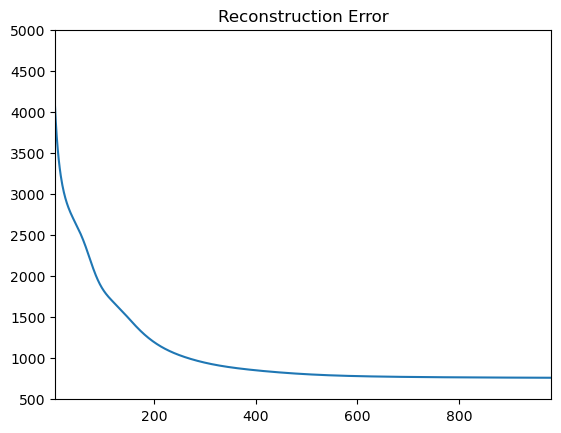

In [54]:
g = sns.lineplot(reconstruction_error_list)  
g.set(xlim=(5, len(reconstruction_error_list)), ylim=(500, 5000))
plt.title('Reconstruction Error')

In [56]:
with open (r"C:\Users\maorb\Desktop\Work\picklefiles\delta_S_list.pkl", 'rb') as f:
    delta_S_list = pickle.load(f)

[(3.0, 14.0), (0.0, 10.0)]

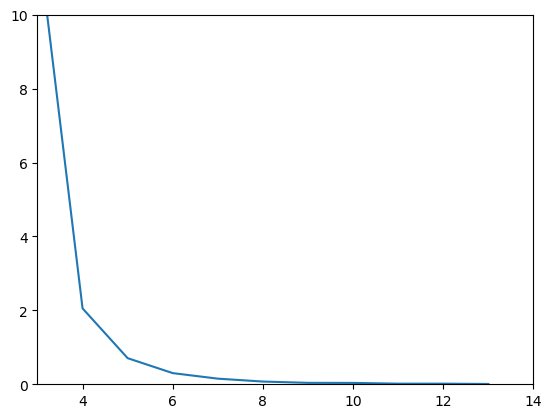

In [64]:
g1 = sns.lineplot(delta_S_list) 
g1.set(xlim=(3, len(delta_S_list)), ylim=(0, 10))
plt.title('Delta S')

***

### Pickle imports

In [197]:
with open (r"C:\Users\maorb\Desktop\Work\picklefiles\reconstruction_error_list.pkl", 'rb') as f:
    reconstruction_error_list = pickle.load(f)

with open (r"C:\Users\maorb\Desktop\Work\picklefiles\delta_S_list.pkl", 'rb') as f:
    delta_S_list = pickle.load(f)

with open (r"C:\Users\maorb\Desktop\Work\picklefiles\W.pkl", 'rb') as f:
    W = pickle.load(f)

with open (r"C:\Users\maorb\Desktop\Work\picklefiles\S.pkl", 'rb') as f:
    S = pickle.load(f)

with open(r"C:\Users\maorb\Desktop\Work\picklefiles\W_1.pkl", 'rb') as f:
    W_1 = pickle.load(f)

with open(r"C:\Users\maorb\Desktop\Work\picklefiles\S_1.pkl", 'rb') as f:
    S_1 = pickle.load(f)

with open(r"C:\Users\maorb\Desktop\Work\picklefiles\reconstruction_error_list_1.pkl", 'rb') as f:
    reconstruction_error_list_1 = pickle.load(f)

with open(r"C:\Users\maorb\Desktop\Work\picklefiles\delta_S_list_1.pkl", 'rb') as f:
    delta_S_list_1 = pickle.load(f)

with open(r"C:\Users\maorb\Desktop\Work\picklefiles\W_5.pickle", 'rb') as f:
    W_5 = pickle.load(f)

with open(r"C:\Users\maorb\Desktop\Work\picklefiles\S_5.pkl", 'rb') as f:
    S_5 = pickle.load(f)

with open(r"C:\Users\maorb\Desktop\Work\picklefiles\reconstruction_error_list_5.pickle", 'rb') as f:
    reconstruction_error_list_5 = pickle.load(f)

with open(r"C:\Users\maorb\Desktop\Work\picklefiles\delta_S_list_5.pickle", 'rb') as f:
    delta_S_list_5 = pickle.load(f)

with open(r"C:\Users\maorb\Desktop\Work\picklefiles\W_50.pickle", 'rb') as f:
    W_50 = pickle.load(f)

with open(r"C:\Users\maorb\Desktop\Work\picklefiles\S_50.pickle", 'rb') as f:
    S_50 = pickle.load(f)

with open(r"C:\Users\maorb\Desktop\Work\picklefiles\reconstruction_error_list_50.pickle", 'rb') as f:
    reconstruction_error_list_50 = pickle.load(f)

with open(r"C:\Users\maorb\Desktop\Work\picklefiles\delta_S_list_50.pickle", 'rb') as f:
    delta_S_list_50 = pickle.load(f)

with open(r"C:\Users\maorb\Desktop\Work\picklefiles\delta_mean_W_50.pkl", 'rb') as f:
    delta_mean_W_50 = pickle.load(f)

with open(r"C:\Users\maorb\Desktop\Work\picklefiles\delta_W.pkl", 'rb') as f:
    delta_mean_W = pickle.load(f)



***

### Reconstruction Error

[Text(0.5, 1.0, 'Reconstruction Error SGD batch size 50'), (0.0, 10.0)]

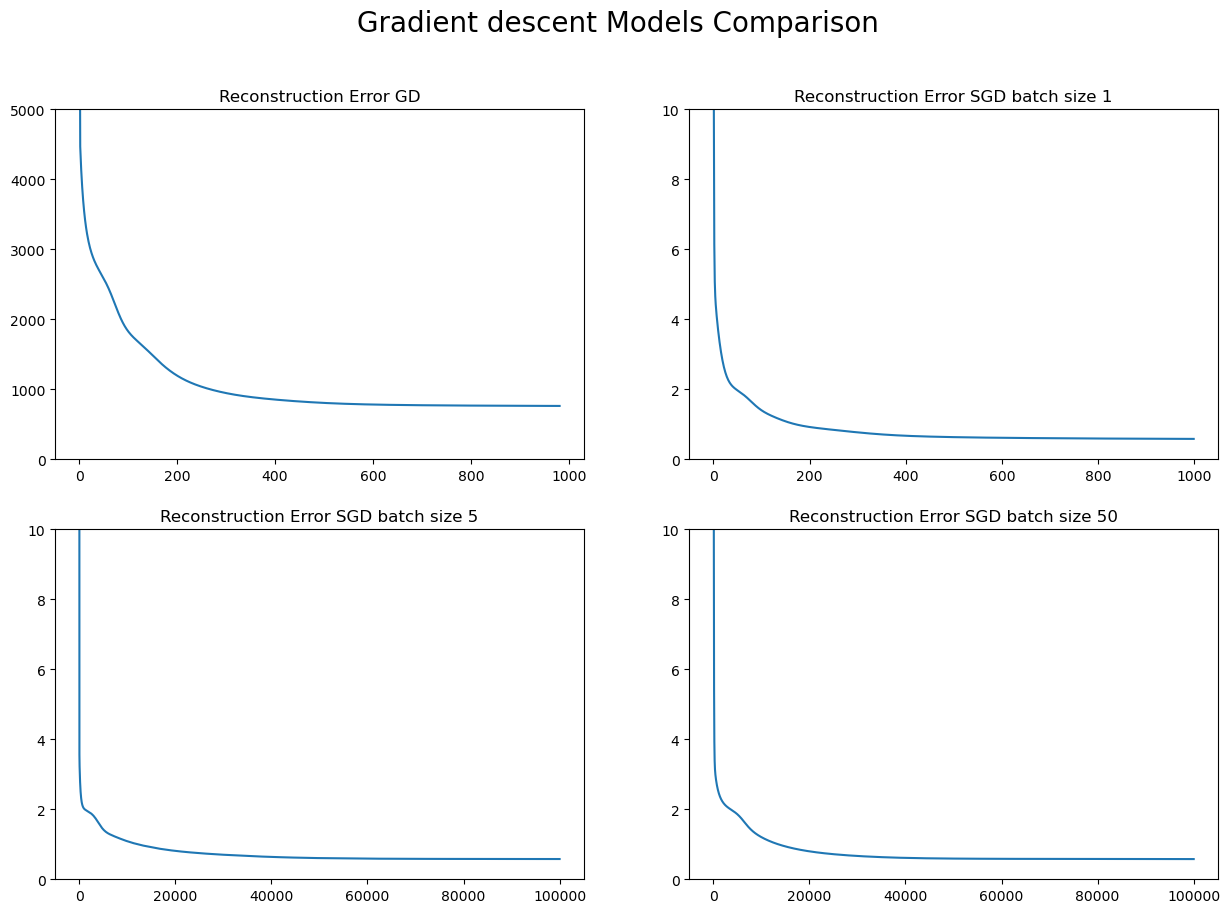

In [78]:
#Let's plot the reconstruction error and delta S for each model:

fig = plt.figure(figsize=(15, 10))
fig.suptitle('Gradient descent Models Comparison', fontsize=20)
plt.subplot(2, 2, 1)
g = sns.lineplot(reconstruction_error_list)
g.set(title='Reconstruction Error GD',ylim=(0, 5000))

plt.subplot(2, 2, 2)
g1 = sns.lineplot(reconstruction_error_list_1)
g1.set(title='Reconstruction Error SGD batch size 1',ylim=(0, 10))

plt.subplot(2, 2, 3)
g2 = sns.lineplot(reconstruction_error_list_5)
g2.set(title='Reconstruction Error SGD batch size 5',ylim=(0, 10))

plt.subplot(2, 2, 4)
g3 = sns.lineplot(reconstruction_error_list_50)
g3.set(title='Reconstruction Error SGD batch size 50',ylim=(0, 10))

We can see a **monotonic decrease** in the loss function. in the SGD the reconstruction error is lower.

***

### Delta S

[Text(0.5, 1.0, 'Delta S list SGD batch size 50'), (0.0, 0.002)]

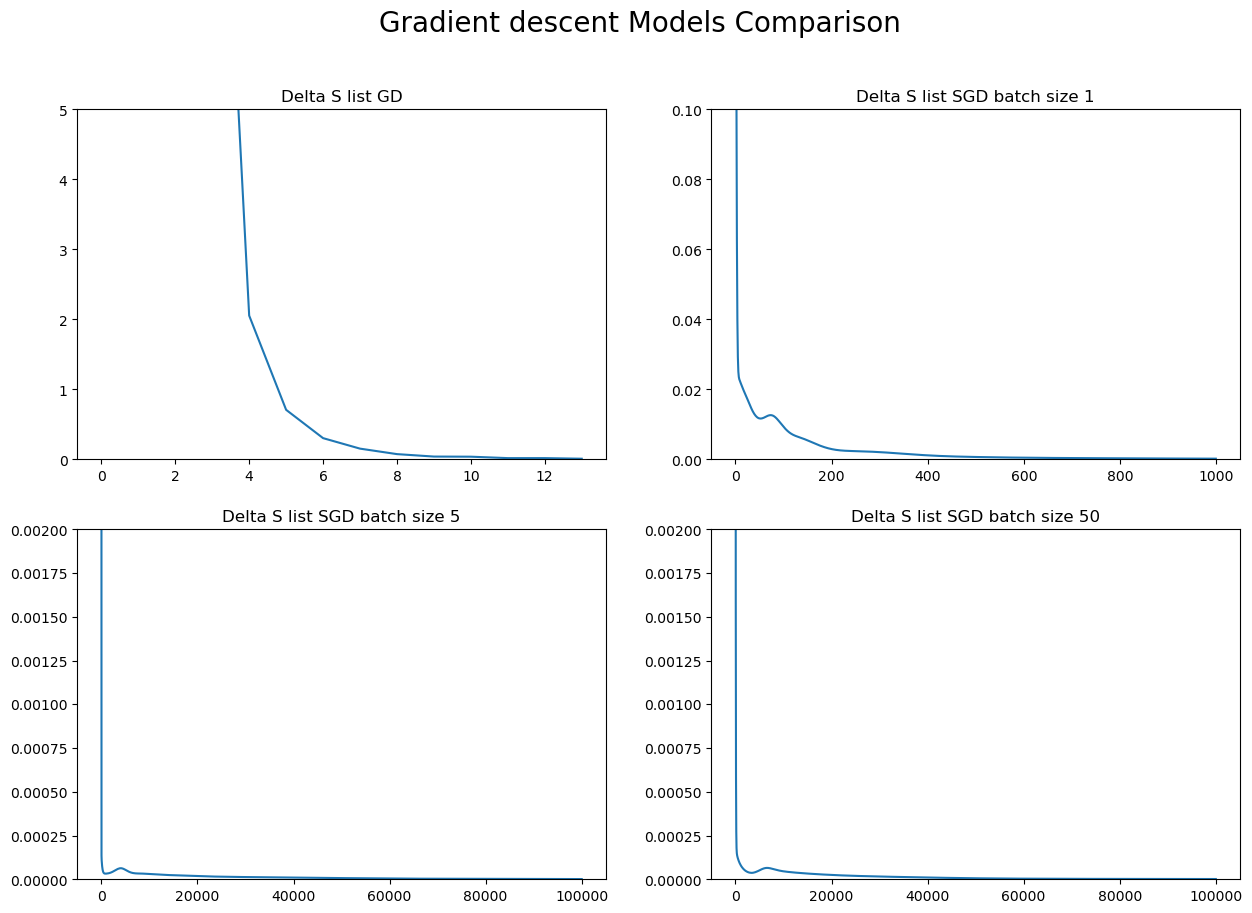

In [160]:
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Gradient descent Models Comparison', fontsize=20)
plt.subplot(2, 2, 1)
g = sns.lineplot(delta_S_list)
g.set(title='Delta S list GD',ylim=(0, 5))

plt.subplot(2, 2, 2)
g1 = sns.lineplot(delta_S_list_1)
g1.set(title='Delta S list SGD batch size 1',ylim=(0, 0.1))

plt.subplot(2, 2, 3)
g2 = sns.lineplot(delta_S_list_5)
g2.set(title= 'Delta S list SGD batch size 5',ylim=(0, .002))

plt.subplot(2, 2, 4)
g3 = sns.lineplot(delta_S_list_50)
g3.set(title='Delta S list SGD batch size 50',ylim=(0, .002))

We can see a **monotonic decrease** in the loss function. in the SGD the delta S is lower.

### Delta W

[Text(0.5, 1.0, 'Delta W SGD with batch size 50'), (0.0, 0.01)]

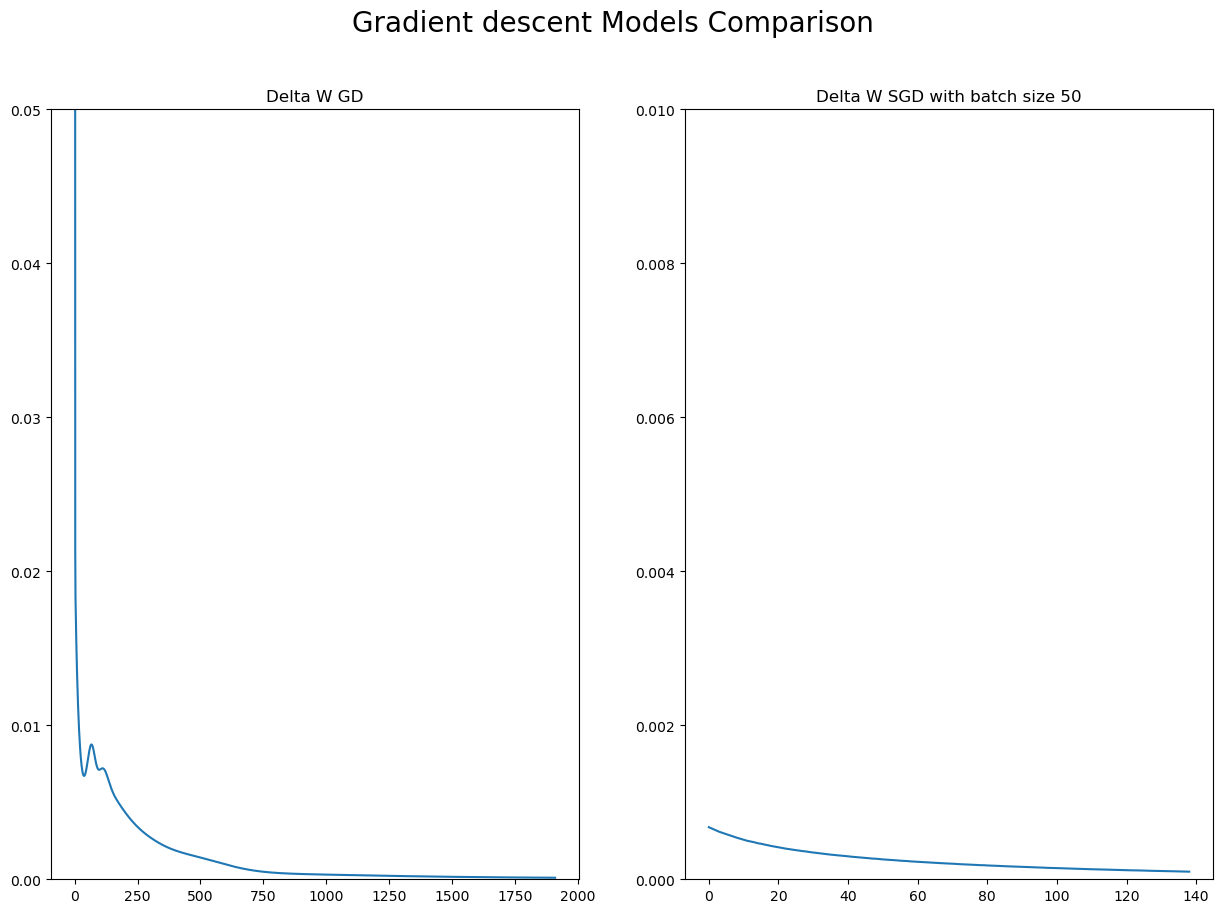

In [198]:
fig = plt.figure(figsize=(15, 10))
fig.suptitle('Gradient descent Models Comparison', fontsize=20)
plt.subplot(1, 2, 1)

g1 = sns.lineplot(delta_mean_W)
g1.set(title='Delta W GD',ylim=(0, .05))

plt.subplot(1, 2, 2)
g = sns.lineplot(delta_mean_W_50)
g.set(title='Delta W SGD with batch size 50',ylim=(0, .01))

*Added delta W, same overall trend as delta S, converges*

We can see a **monotonic decrease** in the loss function. in the SGD the delta W is lower.

***

## **Correlation matrix**

In [69]:
W_flattened = [W[i].flatten() for i in range(len(W))]

In [70]:
data_frames_flattened = [df.flatten() for df in dataframes1_trans_copy]

### Correlation between the weights for the standard GD

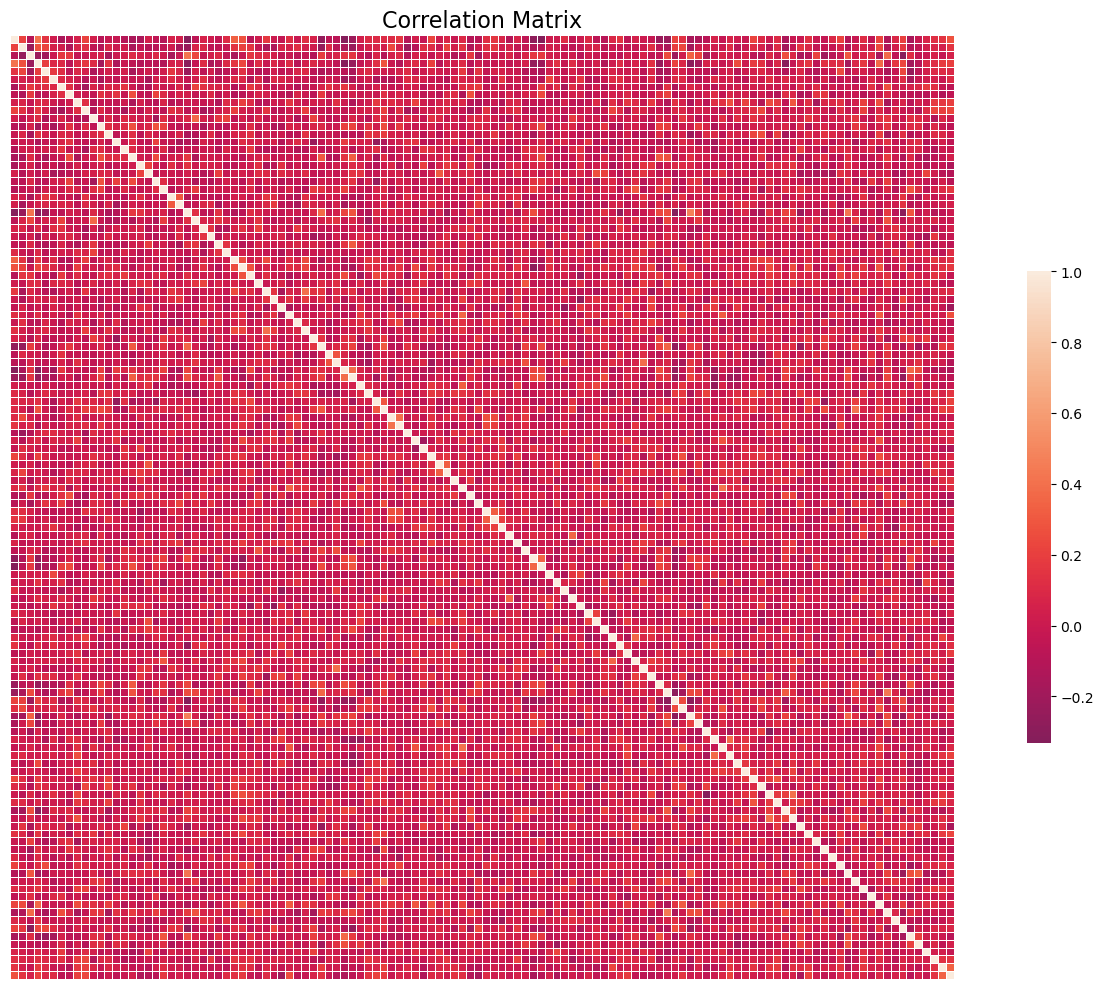

In [71]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ----- Step 1: Data Preparation -----
# Assuming data_frames_flattened is already defined and is a list of NumPy arrays or can be converted to one
X = np.array(W_flattened)  # Shape: (n_samples, n_features)

# ----- Step 2: Compute Correlation Matrix -----
# Set rowvar=False since each column represents a feature
corr_matrix = np.corrcoef(X)

# Initialize the matplotlib figure with the desired size
plt.figure(figsize=(15, 10))

# Create the heatmap
sns.heatmap(
    corr_matrix, 
    cmap='rocket', 
    center=0, 
    square=True, 
    xticklabels=False, 
    yticklabels=False,
    linewidths=0.5,  # Optional: Adds lines between squares for better readability
    cbar_kws={"shrink": 0.5},  # Optional: Adjusts the size of the color bar,
    # title Correlation coefficience
)

# Add title to the heatmap
plt.title("Correlation Matrix", fontsize=16)

# Adjust layout to make room for the title and ensure everything fits well
plt.tight_layout()

# Display the plot
plt.show()


### Correlation between the weights for the SGD with batch size 1

In [73]:
W_1_flattened = [W_1[i].flatten() for i in range(len(W_1))]

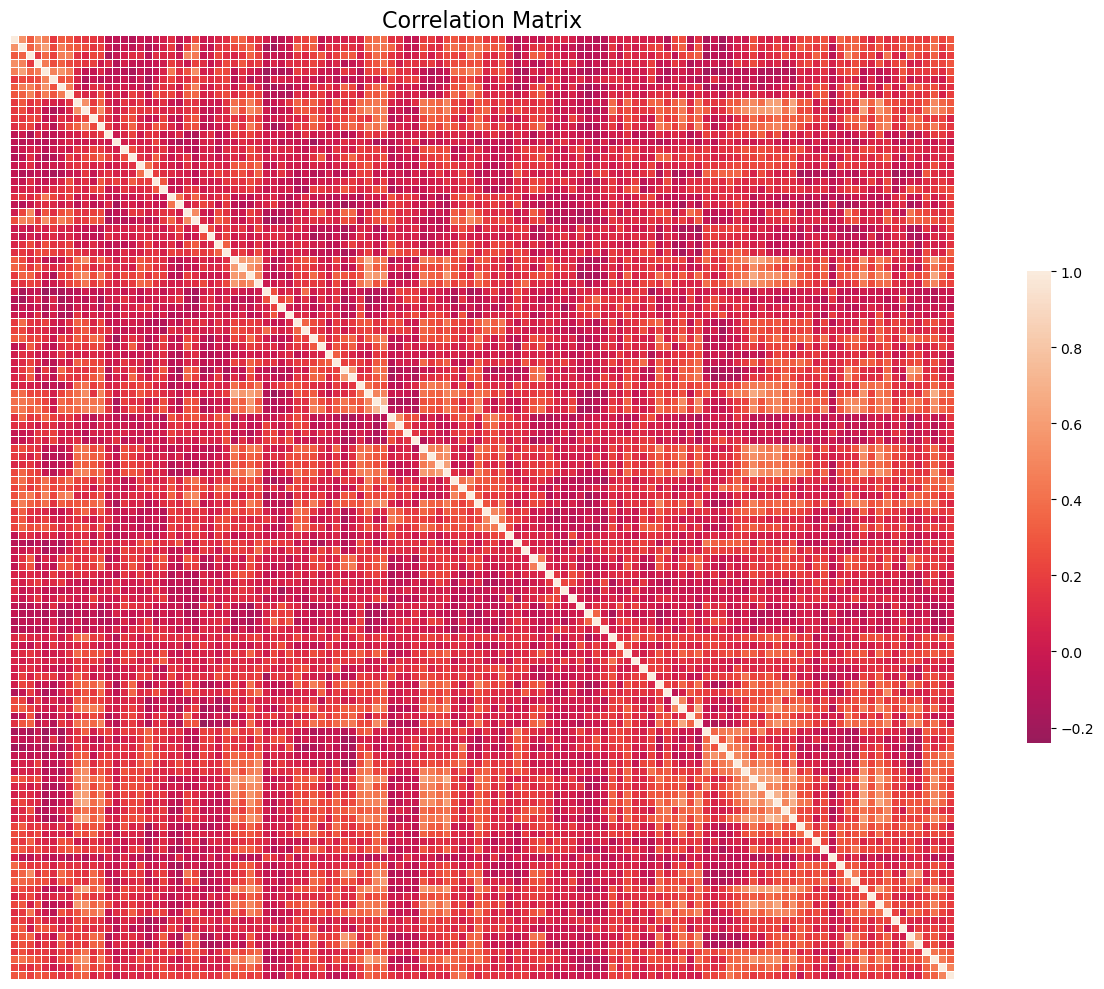

In [74]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ----- Step 1: Data Preparation -----
# Assuming data_frames_flattened is already defined and is a list of NumPy arrays or can be converted to one
X1 = np.array(W_1_flattened)  # Shape: (n_samples, n_features)

# ----- Step 2: Compute Correlation Matrix -----
# Set rowvar=False since each column represents a feature
corr_matrix = np.corrcoef(X1)

# Initialize the matplotlib figure with the desired size
plt.figure(figsize=(15, 10))

# Create the heatmap
sns.heatmap(
    corr_matrix, 
    cmap='rocket', 
    center=0, 
    square=True, 
    xticklabels=False, 
    yticklabels=False,
    linewidths=0.5,  # Optional: Adds lines between squares for better readability
    cbar_kws={"shrink": 0.5},  # Optional: Adjusts the size of the color bar,
    # title Correlation coefficience
)

# Add title to the heatmap
plt.title("Correlation Matrix", fontsize=16)

# Adjust layout to make room for the title and ensure everything fits well
plt.tight_layout()

# Display the plot
plt.show()


### Correlation between the weights for the SGD with batch size 5

In [17]:
with open(r"C:\Users\maorb\Desktop\Work\picklefiles\W_5.pickle", 'rb') as f:
    W_5 = pickle.load(f)

In [18]:
W_5_flattened = [W_5[i].flatten() for i in range(len(W_5))]

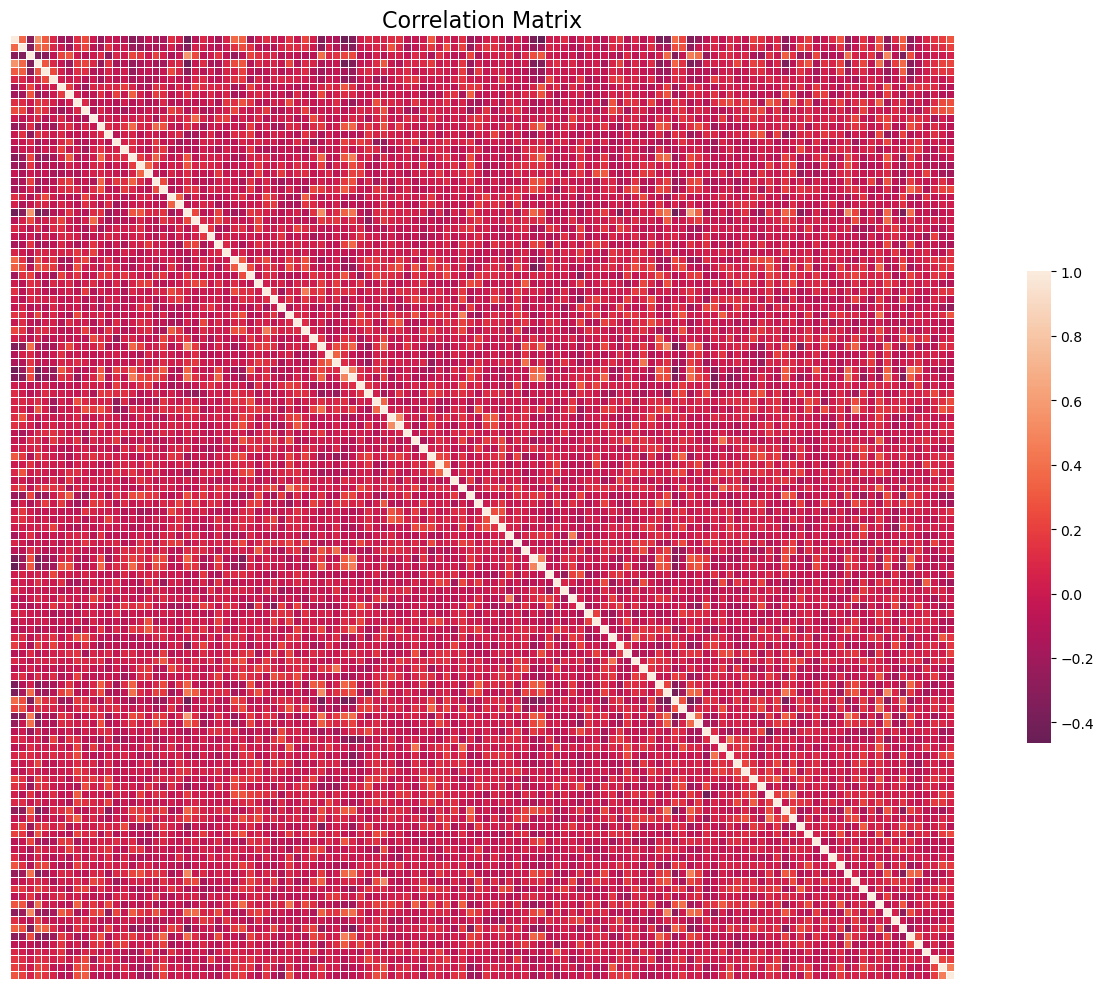

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ----- Step 1: Data Preparation -----
# Assuming data_frames_flattened is already defined and is a list of NumPy arrays or can be converted to one
X5 = np.array(W_5_flattened)  # Shape: (n_samples, n_features)

# ----- Step 2: Compute Correlation Matrix -----
# Set rowvar=False since each column represents a feature
corr_matrix = np.corrcoef(X5)

# Initialize the matplotlib figure with the desired size
plt.figure(figsize=(15, 10))

# Create the heatmap
sns.heatmap(
    corr_matrix, 
    cmap='rocket', 
    center=0, 
    square=True, 
    xticklabels=False, 
    yticklabels=False,
    linewidths=0.5,  # Optional: Adds lines between squares for better readability
    cbar_kws={"shrink": 0.5},  # Optional: Adjusts the size of the color bar,
    # title Correlation coefficience
)

# Add title to the heatmap
plt.title("Correlation Matrix", fontsize=16)

# Adjust layout to make room for the title and ensure everything fits well
plt.tight_layout()

# Display the plot
plt.show()


### Correlation between the weights for the SGD with batch size 50

In [21]:
with open(r"C:\Users\maorb\Desktop\Work\picklefiles\W_50.pickle", 'rb') as f:
    W_50 = pickle.load(f)

In [22]:
W_50_flattened = [W_50[i].flatten() for i in range(len(W_50))]

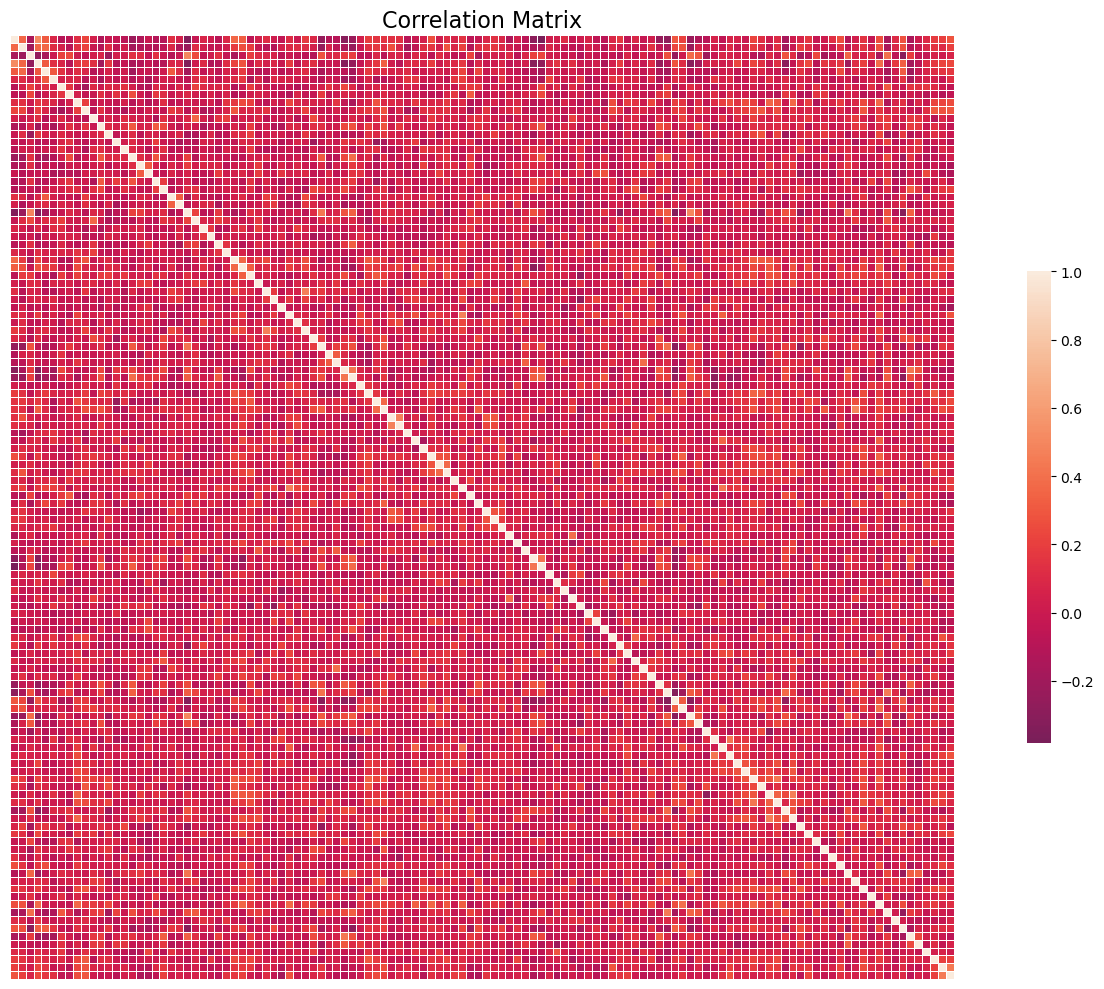

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ----- Step 1: Data Preparation -----
# Assuming data_frames_flattened is already defined and is a list of NumPy arrays or can be converted to one
X50 = np.array(W_50_flattened)  # Shape: (n_samples, n_features)

# ----- Step 2: Compute Correlation Matrix -----
# Set rowvar=False since each column represents a feature
corr_matrix = np.corrcoef(X50)

# Initialize the matplotlib figure with the desired size
plt.figure(figsize=(15, 10))

# Create the heatmap
sns.heatmap(
    corr_matrix, 
    cmap='rocket', 
    center=0, 
    square=True, 
    xticklabels=False, 
    yticklabels=False,
    linewidths=0.5,  # Optional: Adds lines between squares for better readability
    cbar_kws={"shrink": 0.5},  # Optional: Adjusts the size of the color bar,
    # title Correlation coefficience
)

# Add title to the heatmap
plt.title("Correlation Matrix", fontsize=16)

# Adjust layout to make room for the title and ensure everything fits well
plt.tight_layout()

# Display the plot
plt.show()


### Correlation between subject's matrices

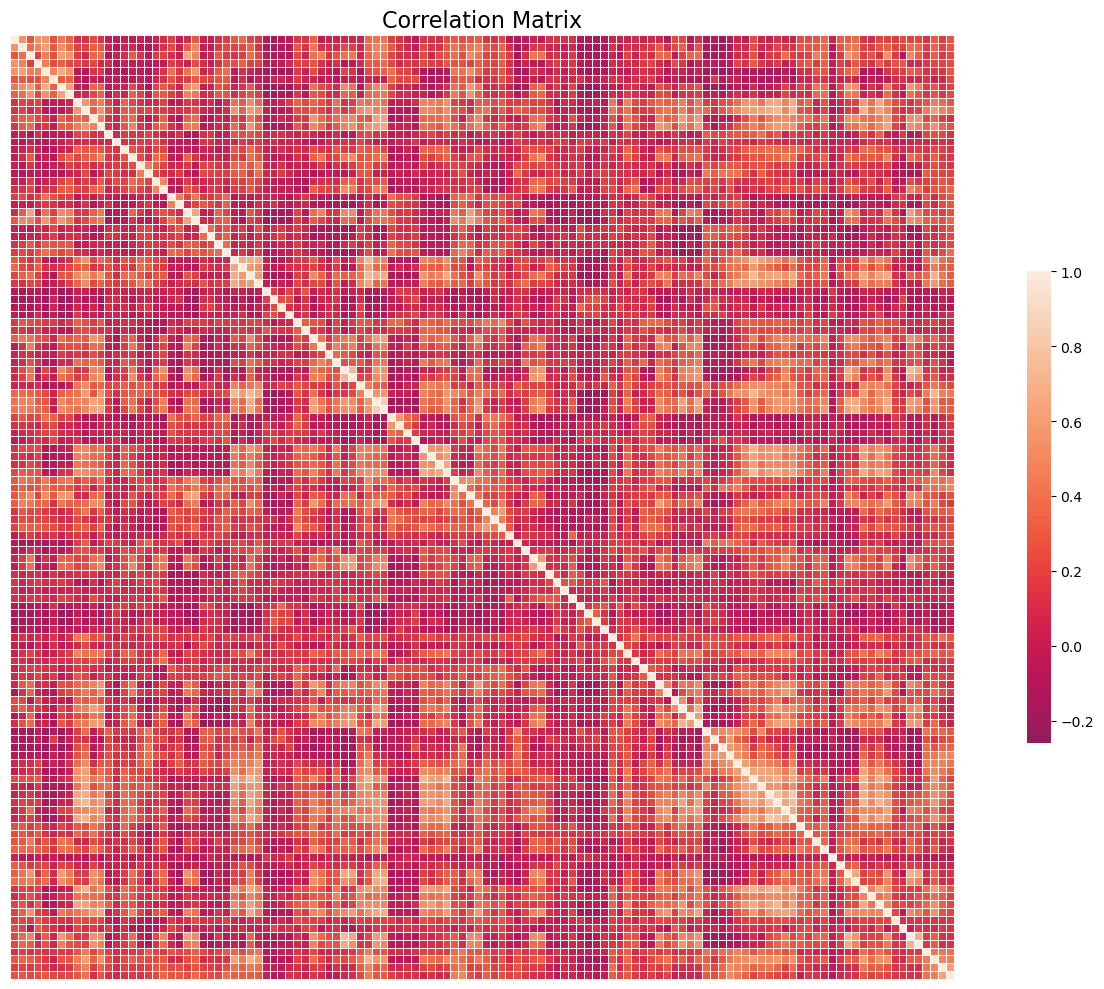

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ----- Step 1: Data Preparation -----
# Assuming data_frames_flattened is already defined and is a list of NumPy arrays or can be converted to one
X1 = np.array(data_frames_flattened)  # Shape: (n_samples, n_features)

# ----- Step 2: Compute Correlation Matrix -----
# Set rowvar=False since each column represents a feature
corr_matrix = np.corrcoef(X1)

# Initialize the matplotlib figure with the desired size
plt.figure(figsize=(15, 10))

# Create the heatmap
sns.heatmap(
    corr_matrix, 
    cmap='rocket', 
    center=0, 
    square=True, 
    xticklabels=False, 
    yticklabels=False,
    linewidths=0.5,  # Optional: Adds lines between squares for better readability
    cbar_kws={"shrink": 0.5},  # Optional: Adjusts the size of the color bar,
    # title Correlation coefficience
)

# Add title to the heatmap
plt.title("Correlation Matrix", fontsize=16)

# Adjust layout to make room for the title and ensure everything fits well
plt.tight_layout()

# Display the plot
plt.show()


## Our Identity Matrix model

In [188]:
def W_i_calc3(X_i, S):
    X_S_T = np.dot(X_i, S.T)
    U_i, Sigma, V_i_T = np.linalg.svd(X_S_T, full_matrices=True)
    W_i = np.dot(U_i, V_i_T)
    return W_i

def SRM(X, tol=1e-3, max_iter=100):
    dist_vec = []
    indices = []
    W_i_vec = []
    W_i_new_vec = []
    delta_S_list = []
    delta_W_list = []
    n = 16
    m = len(X)
    W_i_new_group = np.ones((m, n, n))
    iter_count = 0
    converged = False
    k = 1
    S_old = np.ones((n, X.shape[2]))
    while not converged and iter_count < max_iter:
            S = sum(np.dot(W.T, X_i) for W, X_i in zip(W_i_new_group, X)) / m  # Compute S only once per iteration
            delta_S = np.linalg.norm(S - S_old, 'fro')**2
            delta_S_list.append(delta_S)
            delta_W_sum = 0.0
            if delta_S < tol:
                 print('Delta S is less than tolerance')    
            for j, X_i in enumerate(X):
                # Compute S for the current j
                #S = (1 / len(X)) * sum(np.dot(W.T, X_i) for W in W_i_new_group)
                W_old = W_i_new_group[j].copy()
                W_i_new_group[j] = W_i_calc3(X_i, S)
                delta_W = np.linalg.norm(W_i_new_group[j] - W_old, 'fro')**2
                delta_W_sum += delta_W

                # Calculate distance for convergence check
            dist = [np.linalg.norm(X_i - np.dot(W, S), 'fro')**2 for W in W_i_new_group]
            mean_W = delta_W_sum / len(X)
            delta_W_list.append(mean_W)
            mean_dist = np.mean(dist)
            dist_vec.append(mean_dist)
            indices.append(k)
            k += 1
            S_old = S
            print('iteration:', iter_count, 'mean distance:', mean_dist, 'mean W:', mean_W, 'delta S:', delta_S)
            if mean_dist < tol or mean_W < tol:
                converged = True

            iter_count += 1
            if iter_count >= max_iter:
                converged = True

        # We can find the argmin W_i of the function ||X - W_i @ S||^2 by finding the argmin of ||X - U_i @ D_i @ V_i^T @ S||^2 :

    return iter_count, W_i_new_group, S, dist_vec, delta_S_list, delta_W_list  

In [204]:
def W_i_calc3(X_i, S):
    X_S_T = np.dot(X_i, S.T)
    U_i, Sigma, V_i_T = np.linalg.svd(X_S_T, full_matrices=False)
    W_i = np.dot(U_i, V_i_T)
    return W_i

def SRM(X, tol=1e-3, max_iter=100):
    dist_vec = []
    indices = []
    delta_S_list = []
    delta_W_list = []
    m, n_voxels, n_timepoints = X.shape
    W_i_new_group = np.array([np.eye(n_voxels, k) for _ in range(m)])
    S_old = np.random.rand(k, n_timepoints)
    iter_count = 0
    converged = False

    while not converged and iter_count < max_iter:
        # Update S
        S = sum(np.dot(W_i.T, X_i) for W_i, X_i in zip(W_i_new_group, X)) / m
        delta_S = np.linalg.norm(S - S_old, 'fro')**2
        delta_S_list.append(delta_S)
        delta_W_sum = 0.0
        reconstruction_error_sum = 0.0
        recon_len = 0

        for j, X_i in enumerate(X):
            W_old = W_i_new_group[j].copy()
            W_i_new_group[j] = W_i_calc3(X_i, S)
            delta_W = np.linalg.norm(W_i_new_group[j] - W_old, 'fro')**2
            delta_W_sum += delta_W
            dist = np.linalg.norm(X_i - np.dot(W_i_new_group[j], S), 'fro')**2
            reconstruction_error_sum += dist
            recon_len += 1
            #print(f"Subject {j}, Delta W: {delta_W}")

        mean_W = delta_W_sum / m
        delta_W_list.append(mean_W)
        mean_dist = reconstruction_error_sum / recon_len
        dist_vec.append(mean_dist)
        indices.append(iter_count)

        print(f"Iteration {iter_count}, Mean Distance: {mean_dist}, Mean Delta W: {mean_W}, Delta S: {delta_S}")

        if mean_dist < tol or mean_W < tol:
            print('Converged.')
            converged = True

        S_old = S.copy()
        iter_count += 1

    return iter_count, W_i_new_group, S, dist_vec, delta_S_list, delta_W_list


In [ ]:
iter_count, W_i_new_group, S, dist_vec, delta_S_list,delta_W = SRM(dataframes1_trans_copy, tol=1e-3, max_iter=1000)

[Text(0.5, 1.0, 'Mean Distance'), (2800.0, 2900.0)]

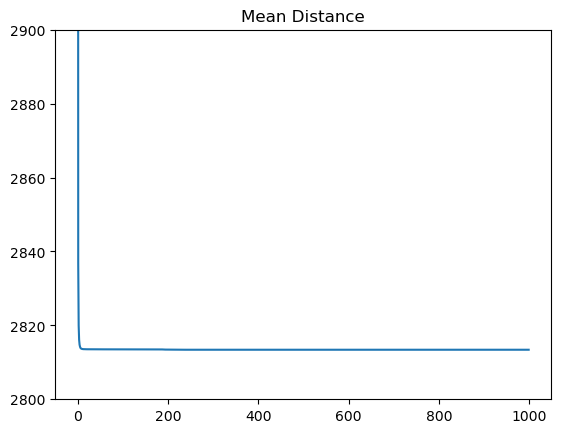

In [232]:
g2 = sns.lineplot(dist_vec) # The delta S converged, but the distance did not converge
g2.set(title='Mean Distance',ylim=(2800, 2900))



It seems that the distance 'converges' to approximately 2813

In [202]:
W_i_flattened = [W_i_new_group[i].flatten() for i in range(len(W_i_new_group))] 

The distances dont converge. Morover, the delta W don't converge (as expected). let's plot the correlation between the weights.

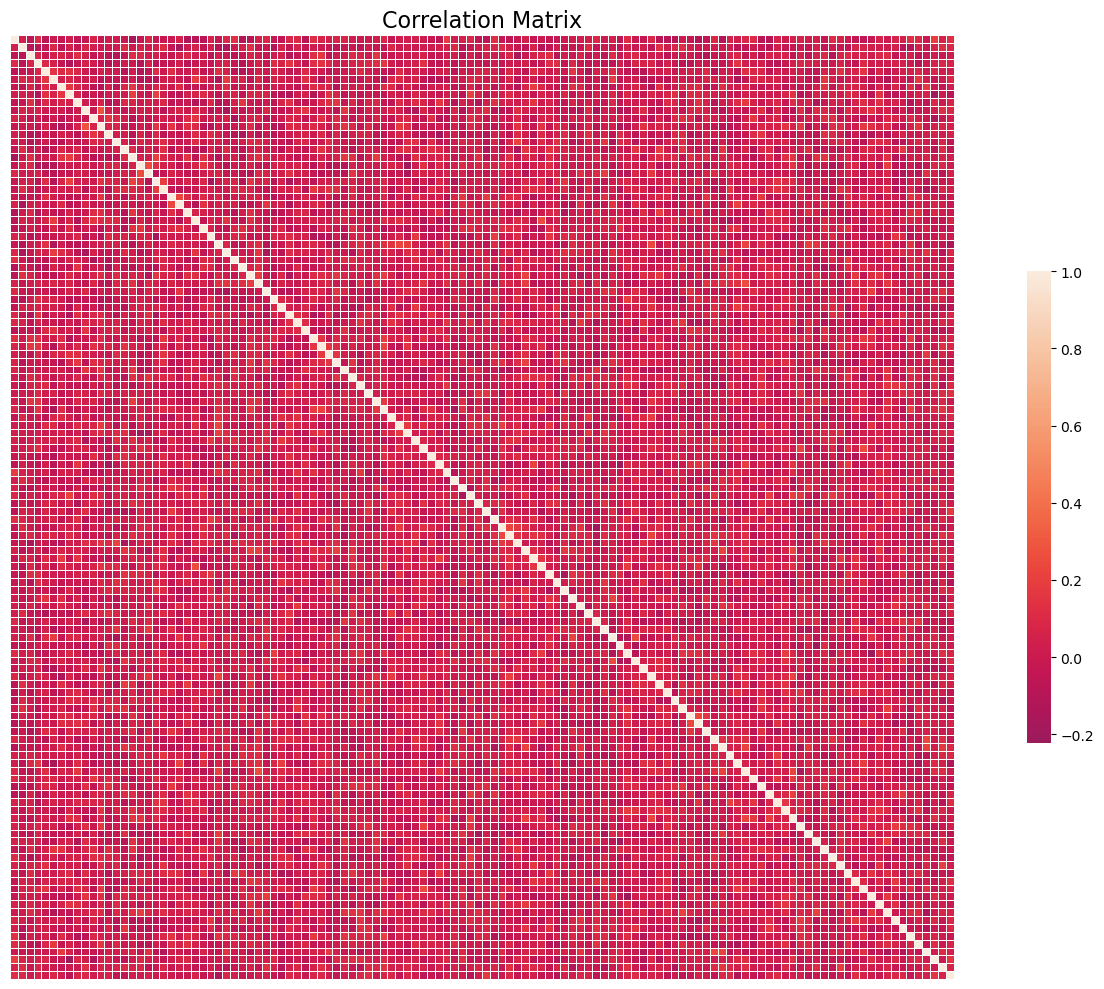

In [203]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ----- Step 1: Data Preparation -----
# Assuming data_frames_flattened is already defined and is a list of NumPy arrays or can be converted to one
Xi = np.array(W_i_flattened)  # Shape: (n_samples, n_features)

# ----- Step 2: Compute Correlation Matrix -----
# Set rowvar=False since each column represents a feature
corr_matrix = np.corrcoef(Xi)

# Initialize the matplotlib figure with the desired size
plt.figure(figsize=(15, 10))

# Create the heatmap
sns.heatmap(
    corr_matrix, 
    cmap='rocket', 
    center=0, 
    square=True, 
    xticklabels=False, 
    yticklabels=False,
    linewidths=0.5,  # Optional: Adds lines between squares for better readability
    cbar_kws={"shrink": 0.5},  # Optional: Adjusts the size of the color bar,
    # title Correlation coefficience
)

# Add title to the heatmap
plt.title("Correlation Matrix", fontsize=16)

# Adjust layout to make room for the title and ensure everything fits well
plt.tight_layout()

# Display the plot
plt.show()


## Different initiation for the weights didnt change it 

In [233]:
from scipy.stats import ortho_group

def SRM_ort(X, tol=1e-3, max_iter=100000):
    dist_vec = []
    indices = []
    delta_S_list = []
    W_i_new_group = np.array([ortho_group.rvs(dim=16) for _ in X])  # Initialize with random orthogonal matrices
    S = np.zeros((16, 16))
    iter_count = 0
    n = 16
    converged = False
    k = 1
    S_old = np.zeros((n, X.shape[2]))
    while not converged and iter_count < max_iter:
        # Update S
        S = sum(np.dot(W_i.T, X_i) for W_i, X_i in zip(W_i_new_group, X)) / m
        delta_S = np.linalg.norm(S - S_old, 'fro')**2
        delta_S_list.append(delta_S)
        delta_W_sum = 0.0
        reconstruction_error_sum = 0.0
        recon_len = 0

        for j, X_i in enumerate(X):
            W_old = W_i_new_group[j].copy()
            W_i_new_group[j] = W_i_calc3(X_i, S)
            delta_W = np.linalg.norm(W_i_new_group[j] - W_old, 'fro')**2
            delta_W_sum += delta_W
            dist = np.linalg.norm(X_i - np.dot(W_i_new_group[j], S), 'fro')**2
            reconstruction_error_sum += dist
            recon_len += 1
            #print(f"Subject {j}, Delta W: {delta_W}")

        mean_W = delta_W_sum / m
        delta_W_list.append(mean_W)
        mean_dist = reconstruction_error_sum / recon_len
        dist_vec.append(mean_dist)
        indices.append(iter_count)

        print(f"Iteration {iter_count}, Mean Distance: {mean_dist}, Mean Delta W: {mean_W}, Delta S: {delta_S}")

        if mean_dist < tol or mean_W < tol:
            print('Converged.')
            converged = True

        S_old = S.copy()
        iter_count += 1

    return iter_count, W_i_new_group, S, dist_vec, delta_S_list, delta_W_list



In [ ]:
iter_count_ort, W_i_new_group_ort, S, dist_vec_ort, delta_S_list_ort, delta_W_list_ort = SRM_ort(dataframes1_trans_copy,
                                                                                                 tol=1e-3, max_iter=1000)

# **Conclusions**

First of all, In the SRM algorithm we assume that the weights are orthogonal, which is a strong assumption.

This algorithm might converge with the correct implementation, as we can see in the GD and SGD with different batches. However, the reconstruction error is still converging to a relatively high value, but the delta W and delta S are converging. Moreover, we didn't assume that the weights are orthogonal in the different GD algorithms. 

Additionally, we got weight matrices acoording to the different implementations of the algorithm. We can try to investigate the correlation between the weights.



